### Unsupervised learning : k-means Clustering
Mall wants to get insights about thier customer . build a system that can cluster different types of customers for the mall , so the mall may make better decisions in thier business

# Workflow :
1. Customer data
2. Data preprocessing
3. Data analysis
4. Optimum number of clusters(WCSS)
5. K-means clustering algorithm model
6. Visualise the clusters 

#### Importing libraries and functions 

In [64]:
# libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns 

# model
from sklearn.cluster import KMeans

### Importing data and anylsis

In [41]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [42]:
# renaming genre
df.rename(columns = {'Genre' : 'Gender'} ,  inplace = True)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [43]:
# statistical review
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [44]:
# basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [45]:
# shape of df
df.shape

(200, 5)

In [46]:
# value of gender counts
df["Gender"].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

In [47]:
#checking null columns 
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [48]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


The columns customer id , gender , age are not required as  spending behavior metric does not rely on these parameters . Only annual income and spending score is valid for this metric of spending behavior .

### Choosing the annual inome and spending score columns 

In [49]:
X = df.iloc[ : , [3,4] ].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

## Choosing the number of clusters 
We have 200 dataset we dont know what is the optimum number of clusters required .
So we use WCSS - > *Within clusters sum of Squares : This method creates graph between annual income and spending score . Then we will be able to see clusters and we find the distance of cluster points from thier centroids* .  *We want lowest wcss value*

In [54]:
# Finding wcss flvue for different number of clusters 
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters= i ,
                    init= 'k-means++', 
                    random_state=42,
                   )
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

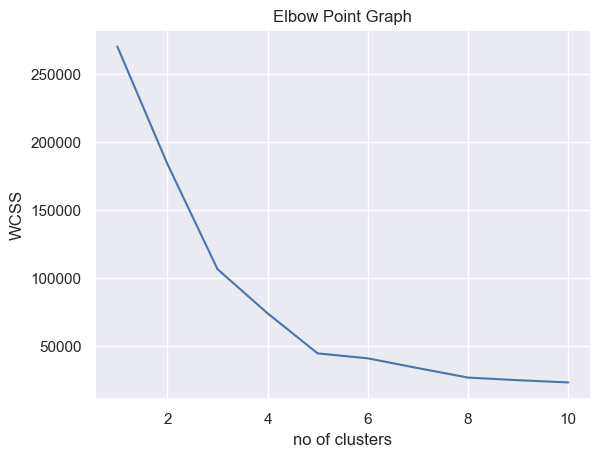

In [55]:
# plot an elbow graph 

sns.set()
plt.plot( range(1,11) , wcss)  # range(1,11
plt.title('Elbow Point Graph')
plt.xlabel('no of clusters')
plt.ylabel('WCSS')
plt.show()

we have 2 elbow points that are sharp significant drops . that are points 3 , and 5 . we pick the elbow point to be 5 as its the lasts point after that we dont have huge depression in graph

## Training the k-means clustering model 
optimum number of clussters = 5

In [58]:
kmeans = KMeans(n_clusters=5,
               init = 'k-means++',
               random_state = 0)

# return a label for each datapoint based on thier cluster 
Y = kmeans.fit_predict(X)
print(Y)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


## Visualising all the clusters 

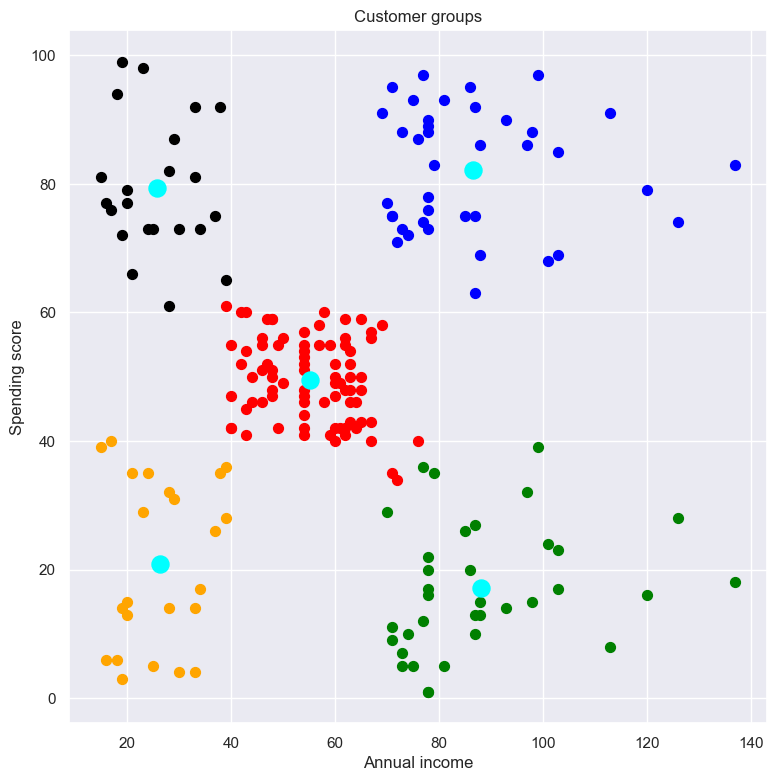

In [63]:
# plotting all the clusters and their centroids
plt.figure(figsize=(9,9))
plt.scatter(X[Y == 0,0] , X[Y ==0,1] , s = 50 , color = 'red' , label = 'Cluester 1')
plt.scatter(X[Y == 1,0] , X[Y ==1,1] , s = 50 , color = 'blue' , label = 'Cluester 2')
plt.scatter(X[Y == 2,0] , X[Y ==2,1] , s = 50 , color = 'green' , label = 'Cluester 3')
plt.scatter(X[Y == 3,0] , X[Y ==3,1] , s = 50 , color = 'orange' , label = 'Cluester 4')
plt.scatter(X[Y == 4,0] , X[Y ==4,1] , s = 50 , color = 'black' , label = 'Cluester 5')


# plot the centroid 
plt.scatter(kmeans.cluster_centers_[:,0] , kmeans.cluster_centers_[:,1] , s=150 , color ='cyan' , label = 'Centroid')


plt.title('Customer groups')
plt.xlabel('Annual income')
plt.ylabel('Spending score')
plt.show()